Will Geary (wcg2111)

# Problem 1 (Theoretical)

Imagine we have a sequence of $N$ observations $(x_1, . . . , x_N)$, where each $x_i \in \{0, 1\}$. We model this sequence as i.i.d. random variables from a negative binomial distribution with unknown parameter $\pi \in [0, 1]$ and known parameter $r > 0$, where

$$
p(x_i = j\ \big| \ \pi, r) = \binom{x_i + r - 1}{x_i}\pi^{x_i}(1-\pi)^r
$$

*(a) What is the joint likelihood of the data $(x_1, . . . , x_N )$?*

Since we assumed each $x_i$ is i.i.d., the joint likelihood for $(x_1, \dots, x_N)$ is the product of the individual likelihoods:

\begin{align*}
L(\pi, r\ |\ x) &= \prod_{i=1}^{N} p(x_i\ |\ \pi, r) & \\
&= \prod_{i=1}^{N} \binom{x_i + r - 1}{x_i}\ \pi^{x_i}(1-\pi)^r & \\
\end{align*}

*(b) Derive the maximum likelihood estimate $\hat{\pi}_{ML}$ for $\pi$.*

The maximum likelihood estimate for $\pi$ seeks the value of $\pi$ that maximizes the likelihood function.

This occurs at the point where the gradient of the likelihood function equals zero:

$$
\nabla_\pi L(\pi, r\ |\ x) = \nabla_\pi \prod_{i=1}^{N} p(x_i\ |\ \pi, r) = 0
$$

The value of $\pi$ that maximizes the likelihood function is equivalent to the value of $\pi$ that maximizes the natural log of the likelihood function (i.e. the log likelihood function). So, we will use the "logarithm trick" to make the differentiation easier. 

Here is the log likelihood function:

\begin{align*}
ln\ L(\pi, r\ |\ x) &= ln\ \prod_{i=1}^{N} p(x_i\ |\ \pi, r) & \\
&= \sum_{i=1}^{N} ln\ p(x_i\ |\ \pi, r)
\end{align*}

Then, to solve for $\hat{\pi}_{ML}$: take the derivative of the log likelihood, set to zero and solve for $\pi$:

\begin{align*}
0 &= \nabla_{\pi}\ \sum_{i=1}^{N}\ ln\ \binom{x_i + r - 1}{x_i} + ln\ \pi^{x_i} + ln\ (1-\pi)^r  & \\
&= \nabla_{\pi}\ \sum_{i=1}^{N}\ ln\ \binom{x_i + r - 1}{x_i} + x_i\ ln\ \pi + r\ ln\ (1-\pi)  & \\
&= \sum_{i=1}^{N} \nabla_{\pi} \Big[ln\ \binom{x_i + r - 1}{x_i} + x_i\ ln\ \pi + r\ ln\ (1-\pi)\Big] & \\
&= \sum_{i=1}^{N} \Big[\cfrac{x_i}{\pi} - \cfrac{r}{(1-\pi)}\Big] & \\
&= \cfrac{\sum_{i=1}^{N} x_i}{\pi} - \cfrac{nr}{(1-\pi)} & \\
&= \sum_{i=1}^{N} x_i (1-\pi) - \pi n r & \\
&= \sum_{i=1}^{N} x_i - \pi\ \sum_{i=1}^{N} x_i - \pi n r & \\
&= \sum_{i=1}^{N} x_i - \pi (\sum_{i=1}^{N} x_i + nr) & \\
\therefore \ \hat{\pi}_{ML} &= \cfrac{\sum_{i=1}^{N} x_i}{\sum_{i=1}^{N} x_i + nr}
\end{align*}

*To help learn $\pi$, you use a prior distribution. You select the distribution $p(\pi) = beta(a, b)$.*

*(c) Derive the maximum a posteriori (MAP) estimate $\hat{\pi}_{MAP}$ for $\pi$ *

Maximum a posteriori (MAP) estimation for $\pi$ seeks the most probable vlaue of $\pi$ under the posterior.

\begin{align*}
\pi_{MAP} &= arg\ max_{\pi}\ p(\pi\ |\ x)   & \\
&= arg\ max_{\pi}\ \cfrac{p(x\ |\ \pi)\ p(\pi)}{p(x)}   & \\
&= arg\ max_{\pi}\ p(x\ |\ \pi) p(\pi) & \\
&= arg\ max_{\pi}\ \prod_{i = 1}^{N}\ p(x_i\ |\ \pi) p(\pi) & \\
&= arg\ max_{\pi}\ ln\Bigg[\prod_{i = 1}^{N}\ p(x_i\ |\ \pi) p(\pi)\Bigg] & \\
&= arg\ max_{\pi}\ \sum_{i = 1}^{N}\ ln\big[p(x_i\ |\ \pi) p(\pi)\big] & \\
&= arg\ max_{\pi}\ \sum_{i = 1}^{N}\ ln\ p(x_i\ |\ \pi) + ln\ p(\pi) & \\
\end{align*}

Note that we have assumptions about $p(x | \pi)$ (~ negative binomial) and $p(\pi)$ (~ beta(a,b)).

To solve for $\pi_{MAP}$, we set the derivative of the objective function w.r.t. $\pi$ equal to zero and solve for $\pi$.

\begin{align*}
0 &= \nabla_{\pi}\ \sum_{i = 1}^{N}\ ln\ p(x_i\ |\ \pi) + ln\ p(\pi) & \\
&= \nabla_{\pi}\ \sum_{i=1}^{N}\ ln \Bigg[\binom{x_i + r - 1}{x_i}\pi^{x_i}(1-\pi)^r\Bigg] + ln \Bigg[\cfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\pi^{a-1}(1-\pi)^{b-1}\Bigg] & \\
&= \sum_{i=1}^{N} \nabla_{\pi} \Bigg[ln \binom{x_i + r - 1}{x_i} + x_i\ ln \pi + r\ ln (1-\pi) + ln \Bigg(\cfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\Bigg) + (a-1)\ ln (\pi) + (b-1)\ ln (\pi-1) \Bigg]& \\
&= \sum_{i=1}^{N} \Bigg[\cfrac{x_i}{\pi} - \cfrac{r}{(1-\pi)} + \cfrac{a-1}{\pi} - \cfrac{b-1}{\pi-1}\Bigg] & \\
&= \cfrac{\sum_{i=1}^{N} x_i}{\pi} - \cfrac{n\ r}{1-\pi} + \cfrac{n(a-1)}{\pi} - \cfrac{n(b-1)}{1-\pi} & \\
&= \sum_{i=1}^{N} x_i(1-\pi) - \pi n r + n (a-1)(\pi-1) - \pi n (b-1) & \\
&= \sum_{i=1}^{N} x_i - \pi \sum_{i=1}^{N} x_i - \pi n r + a\pi n - \pi n - an + n - b\pi n + \pi n & \\
&= \sum_{i=1}^{N} x_i - n(a-1) -\pi \Bigg(\sum_{i=1}^{N} x_i + nr - an + n + bn - n\Bigg) & \\
&= \sum_{i=1}^{N} x_i - n(a-1) -\pi \Bigg(\sum_{i=1}^{N} x_i + nr - n(a + b)\Bigg) & \\
\therefore \ \hat{\pi}_{MAP} &= \cfrac{\sum_{i=1}^{N} x_i - n(a-1)}{\sum_{i=1}^{N} x_i + nr - n(a+b)}
\end{align*}

*(d) Use Bayes rule to derive the posterior distribution of $\pi$ and identify the name of this distribution*

From Bayes rule, $p(\pi\ |\ x_1,\dots,x_n) = \cfrac{p(x_1,\dots,x_n\ |\ \pi)(p(\pi)}{\int_0^1 p(x_1,\dots,x_n\ |\ \pi)p(\pi)d\pi}$ and therefore $p(\pi\ |\ x_1,\dots,x_n) \propto p(x_1,\dots,x_n\ |\ \pi)p(\pi)$.

\begin{align*}
p(\pi\ |\ x_1,\dots,x_n) &\propto p(x_1,\dots,x_n\ |\ \pi)p(\pi) & \\
&\propto \Bigg[\prod_{i=1}^{N} \binom{x_i + r - 1}{x_i}\ \pi^{x_i}(1-\pi)^r \Bigg] \Bigg[\cfrac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\pi^{a-1}(1-\pi)^{b-1}\Bigg]& \\
&\propto \Bigg[\prod_{i=1}^{N} \pi^{x_i}(1-\pi)^r \Bigg] \Bigg[\pi^{a-1}(1-\pi)^{b-1}\Bigg]& \\
&\propto \pi^{\sum_{i=1}^{N} x_i + a - 1}(1-\pi)^{Nr + b -1} & \\
\end{align*}

We recognize the posterior distribution as Beta: $p(\pi\ |\ x_1,\dots,x_n) = Beta\Big(\sum_{i=1}^n x_i + a, Nr + b\Big)$

*(e) What is the mean and variance of $\pi$ under this posterior? Discuss how it relates to $\pi_{ML}$ and $\pi_{MAP}$*

**For the beta distribution:**

$$
E[X] = \cfrac{\alpha}{\alpha + \beta}
$$

and

$$
Var[X] = \cfrac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
$$

So, the mean for $\pi$ under the $Beta\Big(\sum_{i=1}^n x_i + a, Nr + b\Big)$ posterior is:

$$
E[\pi] = \cfrac{\sum_{i=1}^n x_i + a}{(\sum_{i=1}^n x_i + a) + (Nr + b)}
$$

and

$$
Var[\pi] = \cfrac{(\sum_{i=1}^n x_i + a) (Nr + b)}{(\sum_{i=1}^n x_i + a + Nr + b)^2 + (\sum_{i=1}^n x_i + a + Nr + b + 1)}
$$

**How does it relate to $\pi_{ML}$ and $\pi_{MAP}$?**

$\pi_{ML}$ is an unbiased estimator of $\pi$, so $E[\pi_{ML}] = \pi$, and the variance of $\pi_{ML}$ is $Var[\pi_{ML}] = \sigma^2(X^TX)^{-1}$.



Maximum Likelihood Estimation is unbiased but may have very large variance. To deal with this, we may reduce the variance by introducing bias to the estimate. This is the idea behind Ridge Regression and Maximum a Posteriori Estimation. As $N$ approaches $\infty$, $\pi_{ML}$ and $\pi_{MAP}$ become identical.

# Problem 2 (Coding)

** Part 1 **

*(a) For $\lambda = 0, 1, 2, 3, \dots, 5000$, solve for wRR. (Notice that when $\lambda = 0$, wRR = wLS). In one figure plot the 7 values in wRR as a function of df($\lambda$). You will need to call a built in SVD function to do this (all details are in the slides). Be sure to label your 7 curves by their dimension in x.*

In mathematical notation, the ridge regression solution is: $w_{RR} = (\lambda I + X^TX)^{-1}X^Ty$.

The below code will implement ridge regression in Python and plot the 7 values of $w_{RR}$ as a function of $df(\lambda)$.

In [3]:
# import numpy and pandas for matrix math and data processing
import numpy as np
import pandas as pd

# import matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

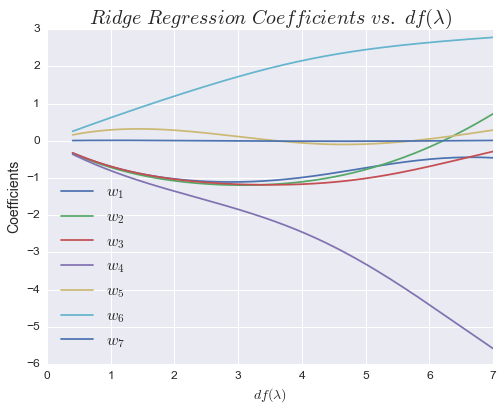

In [454]:
# load the training data
X_train_df = pd.read_csv('hw1-data/X_train.csv', header=None) 
y_train_df = pd.read_csv('hw1-data/y_train.csv', header=None)

X_train = np.matrix(X_train_df) # convert to matrix
y_train = np.matrix(y_train_df) # convert to matrix

# ridge regression function
def RidgeReg(X, y, lam):
    XTX = np.dot(X.transpose(), X)
    XTy = np.dot(X.transpose(), y)
    I = np.identity(len(XTX))
    L = lam
    w_RR = np.linalg.inv(L*I + XTX) * XTy
    return w_RR

# plot coefficients as a function of df(lambda)
def RidgePlot(X, y, lambda_range=5000):
    
    r = range(lambda_range + 1)
    
    # singular value decompositions
    U, S, V = np.linalg.svd(X_train)
    
    # initialize empty list to store df(lambda) values
    df_lambda_list = []
    
    # initialize empty lists to store coefficients
    possible_w_RR = []
    w_1, w_2, w_3, w_4, w_5, w_6, w_7 = [], [], [], [], [], [], []

    # run ridge regression for each value of lambda
    for i in r:
        w = RidgeReg(X, y, i)
        
        # store coefficient values for each value of lambda
        possible_w_RR.append(w)
        w_1.append(float(possible_w_RR[i][0]))
        w_2.append(float(possible_w_RR[i][1]))
        w_3.append(float(possible_w_RR[i][2]))
        w_4.append(float(possible_w_RR[i][3]))
        w_5.append(float(possible_w_RR[i][4]))
        w_6.append(float(possible_w_RR[i][5]))
        w_7.append(float(possible_w_RR[i][6]))
        
        # degrees of freedom of lambda
        df_lambda = np.sum(S**2 / (i+S**2))
        df_lambda_list.append(df_lambda)

    # initialize plot
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plot each coefficient
    plt.plot(df_lambda_list, w_1, label="$w_1$")
    plt.plot(df_lambda_list, w_2, label="$w_2$")
    plt.plot(df_lambda_list, w_3, label="$w_3$")
    plt.plot(df_lambda_list, w_4, label="$w_4$")
    plt.plot(df_lambda_list, w_5, label="$w_5$")
    plt.plot(df_lambda_list, w_6, label="$w_6$")
    plt.plot(df_lambda_list, w_7, label="$w_7$")

    # add finishing touches to plot
    plt.legend(loc="best", fontsize=16)
    plt.xlabel("$df(\lambda)$", fontsize=14)
    plt.ylabel("Coefficients", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    plt.title("$Ridge\ Regression\ Coefficients\ vs.\ df(\lambda) $", 
              fontsize=20)
    
RidgePlot(X_train, y_train, 5000)

*(b) The 4th dimension (car weight) and 6th dimension (car year) clearly stand out over the other dimensions. What information can we get from this?*

Indeed, the coefficients $w_4$ and $w_6$ do stand out from the others. At lambda = 0, here is what the coefficients look like:

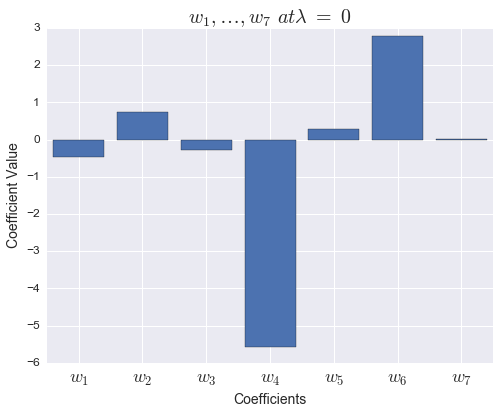

In [699]:
fig, ax = plt.subplots(figsize=(8,6))

plt.bar(range(1,8), np.array(RidgeReg(X_train, y_train, 0)), 
        align="center")
ax.set_xticks(range(1,8))
ax.set_xticklabels(['$w_1$', '$w_2$', '$w_3$', '$w_4$', '$w_5$', 
                    '$w_6$', '$w_7$'])
ax.set_xlim([.5, 7.5])
ax.set_xlabel("Coefficients", fontsize=14)
ax.set_ylabel("Coefficient Value", fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_title("$w_1, \dots, w_7\ at\lambda\ =\ 0$", fontsize=20);

From this, one may interpret that a single-unit increase or decrease in $w_4$ (car weight) or $w_6$ (car year) will have a larger impact on $\hat{y}$ (miles per gallon) than single-unit increases or decreases in the other features. $w_4$ is negative, implying that as cars increase in weight they tend to decrease in mpg, whereas $w_6$ is positive, implying that as cars increase in the year they were manufactured they tend to increase in mpg. Both of these make intuitive sense - we would expect newer, lighter cars to have higher mpg than older, heavier cars.

*(c) For $\lambda = 0, \dots, 50$, predict all 42 test cases. Plot the root mean squared error (RMSE)$^2$ on the test set as a function of $\lambda$ -- **not** as a function of $df(\lambda)$. What does this figure tell you when choosing $\lambda$ for this problem (and when choosing between ridge regression and least squares?*

The below Python code will load the test data, use our model to predict all test cases and plot the RMSE$^2$ as a function of $\lambda$.

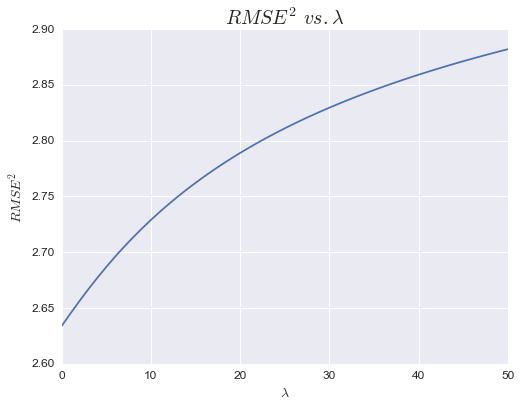

In [698]:
# load the test data
X_test_df = pd.read_csv('hw1-data/X_test.csv', header=None) 
y_test_df = pd.read_csv('hw1-data/y_test.csv', header=None)

X_test = np.matrix(X_test_df) # convert to matrix
y_test = np.matrix(y_test_df) # convert to matrix

def RMSE(X_test, y_test, lam=0):
    # generate wRR coefficients using RidgeReg
    w = RidgeReg(X_train, y_train, lam)

    # predict y values from test data
    y_hat = X_test*w

    # calculate the residuals
    residuals = y_hat - y_test

    # calculate the error metrics
    SSE = residuals.transpose()*residuals
    MSE = SSE / len(X_test)
    RMSE = np.sqrt(MSE)
    
    return RMSE

def plotRMSE(X_test, y_test, lam_range=50):
    r = range(lam_range + 1)
    
    # initialize empty list to store RMSE's at different lambdas
    RMSE_list = []
    
    for i in r:
        RMSE_ = RMSE(X_test, y_test, i)
        RMSE_list.append(float(RMSE_))
        
    # initialize plot
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plot RMSE's
    plt.plot(r, RMSE_list, label="RMSE")
    
    # add finishing touches to plot
    plt.xlabel("$\lambda$", fontsize=14)
    plt.ylabel("$RMSE^2$", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    plt.title("$RMSE^2\ vs.\lambda $", fontsize=20)
        
plotRMSE(X_test, y_test, 50)

This figure tells us that when we increase $\lambda$ we increase RMSE, and that RMSE is minimized when $\lambda = 0$. Least Squares is equivalent to Ridge Regression with $\lambda = 0$, so when choosing between Least Squares and Ridge Regression there is a trade-off: Ridge Regression estimator will have smaller variance but bigger RMSE than least squares.

** Part 2 **

*Modify your code to learn a $p$th-order polynomial regression for $p = 1, 2, 3$. (You've already done p=1 above). For this implementation, do not include the cross terms for this problem, but instead use the method discussed in the slides.*

*(d) In one figure, plot the test RMSE as a function of $\lambda = 0, \dots, 500$ for $p = 1, 2, 3$. Based on this plot, which value of $p$ should you choose and why? How does your assessment of the ideal value of $\lambda$ change for this problem?*

From the lecture slides:

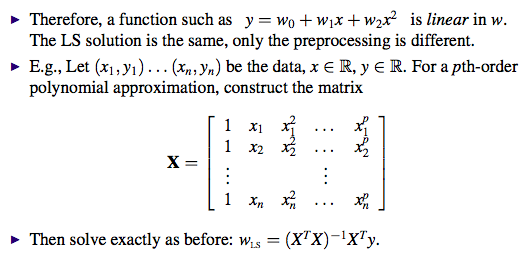

In [131]:
from IPython.display import Image
Image(filename='polynomial.png') 

So, we need to format the X_train matrix below to match the format shown in the image above.

In [532]:
from sklearn.preprocessing import PolynomialFeatures

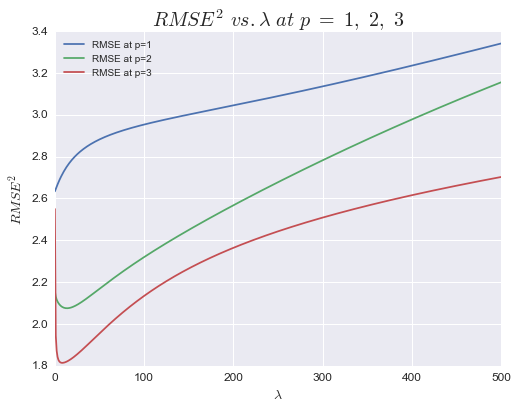

In [707]:
# function to process X_train for polynomial regression
def polyProcess(X, p=1):
    # delete the 7th column filled with ones
    X_train_clean = np.delete(X, 6, axis=1)
    
    # sklearn polynomial features function
    poly = PolynomialFeatures(p, interaction_only=False)
    X_train_poly = np.matrix(poly.fit_transform(X_train_clean))
    return X_train_poly


# polynomial ridge regression function
def polyRidgeReg(X_train, y_train, lam):
    XTX = np.dot(X_train.transpose(), X_train)
    XTy = np.dot(X_train.transpose(), y_train)
    I = np.identity(len(XTX))
    L = lam
    w_RR = np.linalg.inv(L*I + XTX) * XTy
    return w_RR

# calculate RMSE
def polyRMSE(X_test, y_test, X_train, y_train, lam=0, p=1):
    w = polyRidgeReg(polyProcess(X_train, p), y_train, lam)
    
    # predict y values from test data
    y_hat = polyProcess(X_test, p)*w
    
    # calculate the residuals
    residuals = y_hat - y_test
    
    # calculate the error metrics
    SSE = residuals.transpose()*residuals
    MSE = SSE / len(X_test)
    RMSE = np.sqrt(MSE)
    
    return RMSE

# plot RMSE as function of lambda 0:500 for p = 1,2,3
def plotPolyRMSE(X_test, y_test, lam_range=500):
    r = range(lam_range + 1)
    
    # initialize empty list to store RMSE's at different lambdas
    RMSE_1_list = []
    RMSE_2_list = []
    RMSE_3_list = []
    
    p=1
    for i in r:
        RMSE_ = polyRMSE(X_test, y_test, X_train, y_train, i, p)
        RMSE_1_list.append(float(RMSE_))
        
    p=2
    for i in r:
        RMSE_ = polyRMSE(X_test, y_test, X_train, y_train, i, p)
        RMSE_2_list.append(float(RMSE_))
        
    p=3
    for i in r:
        RMSE_ = polyRMSE(X_test, y_test, X_train, y_train, i, p)
        RMSE_3_list.append(float(RMSE_))
        
    # initialize plot
    fig, ax = plt.subplots(figsize=(8,6))
    
    # plot RMSE's
    plt.plot(r, RMSE_1_list, label="RMSE at p=1")
    plt.plot(r, RMSE_2_list, label="RMSE at p=2")
    plt.plot(r, RMSE_3_list, label="RMSE at p=3")    
    
    # add finishing touches to plot
    plt.xlabel("$\lambda$", fontsize=14)
    plt.ylabel("$RMSE^2$", fontsize=14)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.xaxis.set_tick_params(labelsize=12)
    plt.title("$RMSE^2\ vs.\lambda\ at\ p\ =\ 1,\ 2,\ 3 $", fontsize=20)
    plt.legend(loc="best")
        
plotPolyRMSE(X_test, y_test, 500)

Previously, when we were looking only at RMSE for $p=1$, we saw that RMSE was minimized at $\lambda = 0$. This figure tells us that this is not the case for $p=2$ or $p=3$: there are non-zero values of $\lambda$ where RMSE is minimized for $p = 2, 3$.
 
Clearly, the RSME curve is smaller for $p=3$ than $p=2$ or $p=1$, so we should choose $p=3$ to minimize RMSE.

Our assessment of the ideal value of $\lambda$ changes for this problem in the following way: We wish to find the value of $\lambda$ that minimizes RMSE at $p=3$. We can do this using argmin:

RMSE for $p=1$ is minimized at $\lambda$ = 0 --> min RMSE = 2.63364357797

RMSE for $p=2$ is minimized at $\lambda$ = 14 --> min RMSE = 2.07513959146

RMSE for $p=3$ is minimized at $\lambda$ = 8 --> min RMSE = 1.81404417865

So, if our goal is to choose $p$ and $\lambda$ such that we minimize RMSE, we will choose $p=3$ and $\lambda = 8$ to achieve minimum RMSE = 1.814.

In [722]:
r = range(500 + 1)

# initialize empty list to store RMSE's at different lambdas
RMSE_1_list = []
RMSE_2_list = []
RMSE_3_list = []

p=1
for i in r:
    RMSE_1 = polyRMSE(X_test, y_test, X_train, y_train, i, p)
    RMSE_1_list.append(float(RMSE_1))

p=2
for i in r:
    RMSE_2 = polyRMSE(X_test, y_test, X_train, y_train, i, p)
    RMSE_2_list.append(float(RMSE_2))

p=3
for i in r:
    RMSE_3 = polyRMSE(X_test, y_test, X_train, y_train, i, p)
    RMSE_3_list.append(float(RMSE_3))

print "RMSE for p=1 is minimized at lambda =", np.argmin(RMSE_1_list), "--> min RMSE =", min(RMSE_1_list)
print "RMSE for p=2 is minimized at lambda =", np.argmin(RMSE_2_list), "--> min RMSE =", min(RMSE_2_list)
print "RMSE for p=3 is minimized at lambda =", np.argmin(RMSE_3_list), "--> min RMSE =", min(RMSE_3_list)

RMSE for p=1 is minimized at lambda = 0 --> min RMSE = 2.63364357797
RMSE for p=2 is minimized at lambda = 14 --> min RMSE = 2.07513959146
RMSE for p=3 is minimized at lambda = 8 --> min RMSE = 1.81404417865
